# Bar code segmentation

In [13]:
from feature_maps import laws_textures
import cv2, matplotlib.pyplot as plt, os, numpy as np

DIR = "data_participants/processed/train"

def load_train():
    out = []
    for file in os.listdir(DIR):
        if file.endswith(".jpg"):
            path = os.path.join(DIR, file)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            out.append(img)
    return out

In [14]:
trainset = load_train()
len(trainset)

1299

## Plot textures

In [15]:
laws = laws_textures(vector_dims = 5)

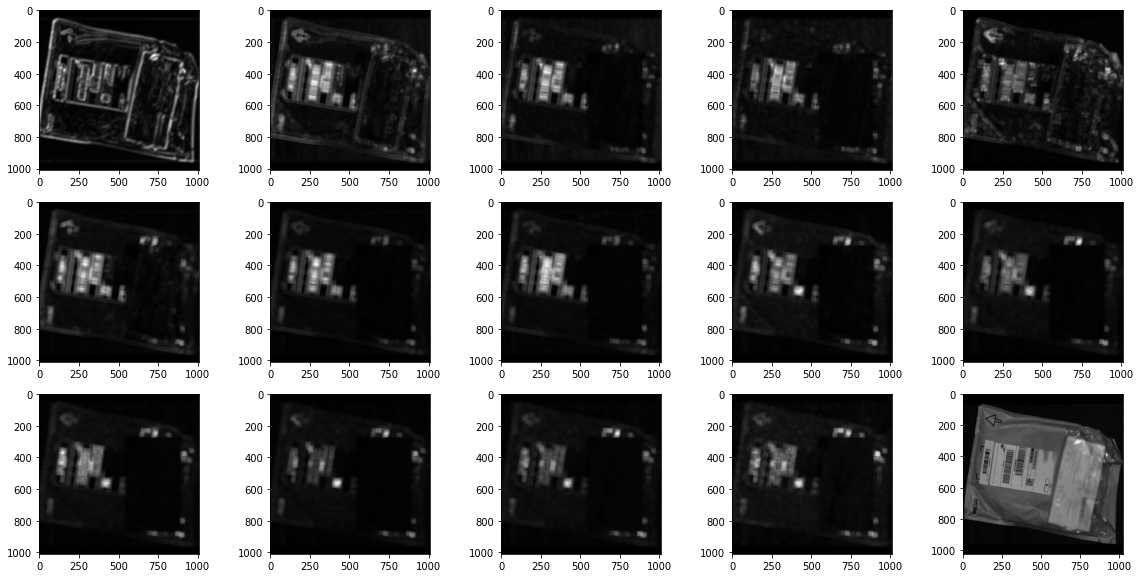

(1010, 1010, 14)

In [22]:
img = trainset[ np.random.choice(len(trainset)) ]

maps = laws.get_features(img, preprocess = True, merge_symmetric = True, compute_energy = True)

rows = 5
cols = 3
fig, axs = plt.subplots(cols, rows, figsize=(20, 10))

for i in range(cols):
    for j in range(rows):
        index = i*rows+j
        if index == 14:
            axs[i,j].imshow(img, cmap = "gray")
        else:
            axs[i,j].imshow(maps[...,index], cmap = "gray")
plt.show()
maps.shape

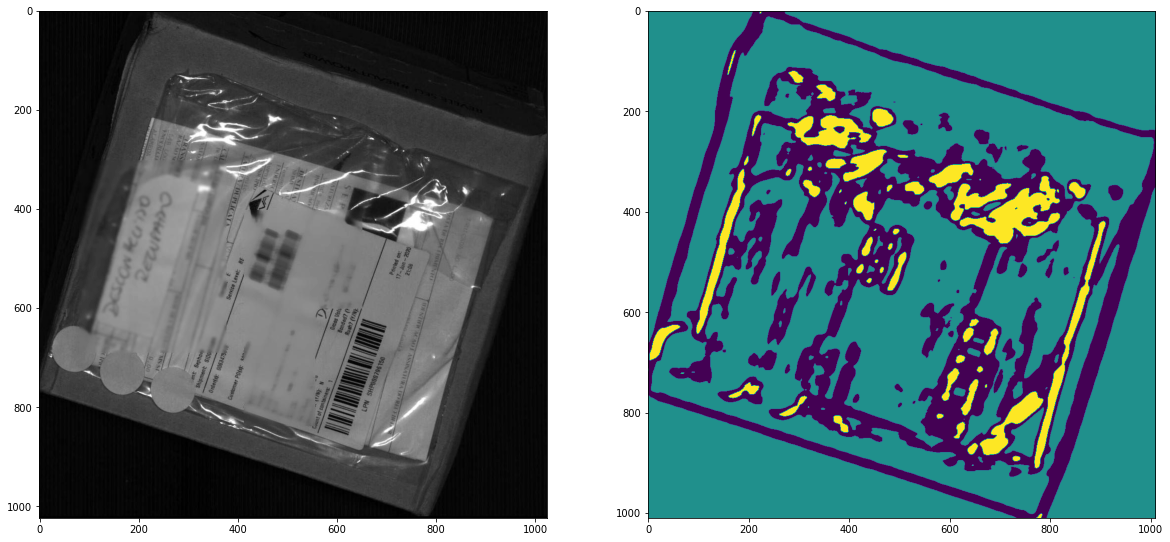

In [36]:
from sklearn.cluster import KMeans

def get_points(maps):
    out = []
    for x in range(maps.shape[0]):
        for y in range(maps.shape[1]):
            out.append( maps[x,y,:] )
    return out

img = trainset[ np.random.choice(len(trainset)) ]
maps = laws.get_features(img, preprocess = True, merge_symmetric = True, compute_energy = True)
points = get_points(maps)

kmeans = KMeans(n_clusters = 3, random_state = 0).fit(points)
segmentation = kmeans.labels_.reshape(maps.shape[:2])

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(img, cmap = "gray")
axs[1].imshow(segmentation)
plt.show()